In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Contents

* [<font size=4>Getting Started</font>](#1)
    * [Kernel](#1.1)
    * [Linear Kernel](#1.1)
    * [Polynomial Kernel](#1.2)
    * [Support Vector Regression](#1.3)
    * [Support Vector Parameters](#1.4)

# Getting Started <a id="1"></a>
Here we describe importing the library, impoting the datset and some basic checks on the dataset

# Kernel <a id="1.1"></a>

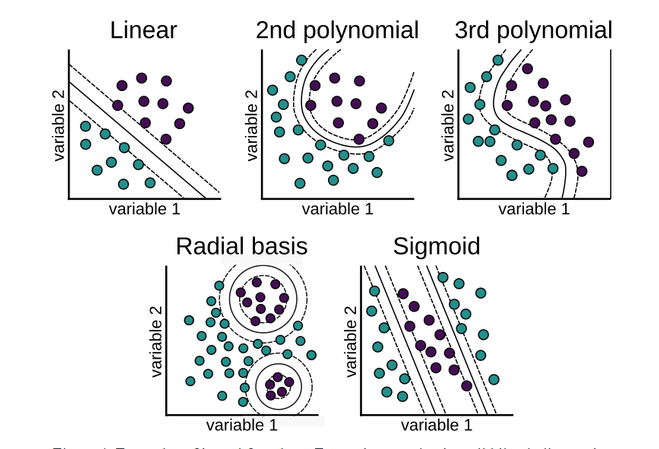

# Linear Kernel <a id="1.2"></a>

In [ ]:
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets


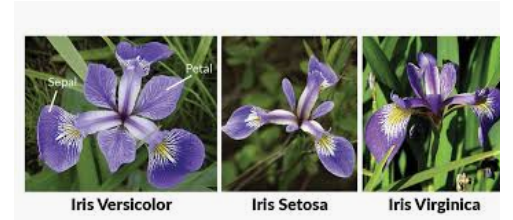

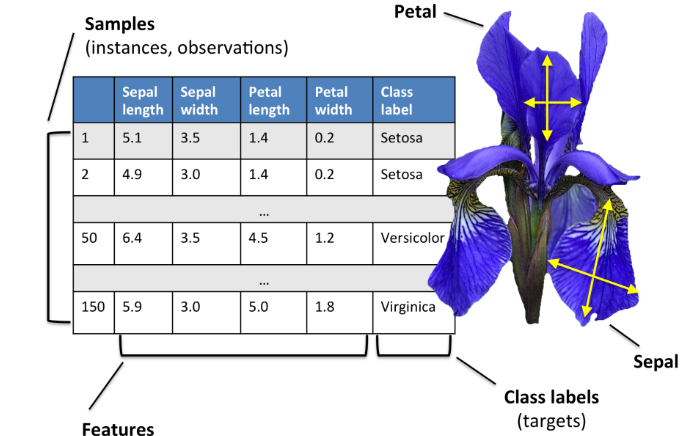

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear",C=10)
svm_clf.fit(X, y)

In [ ]:
print(svm_clf.support_vectors_)

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


# The decison boundary of iris

In [ ]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal Width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# A Small value of C

In [ ]:
svm_clf = SVC(kernel="linear",C=0.1)
svm_clf.fit(X, y)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal Width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# Polynomial Kernel <a id="1.2"></a>

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
# SVM Classifier model
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

In [ ]:
plot_svc_decision_boundary(svm_clf, -1.5, 3.5)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.ylabel("X2", fontsize=14)
plt.xlabel("X1", fontsize=14)
plt.axis([-1.5, 3.5, -1, 1.5])
plt.show()

# SVC with Linear Kernel Versus Linerar SVC

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.**

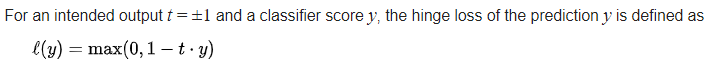   Wikipedia

# Hinge Loss

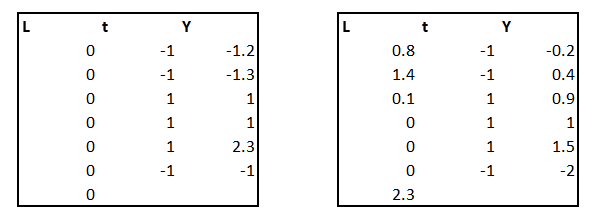

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [ ]:
svm_clf2 = SVC(kernel="poly", degree=2, coef0=1, C=5)
svm_clf2.fit(X, y)
plot_predictions(svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Support Vector Regression <a id="1.4"></a>

** Getting the model and the data**

In [ ]:
from sklearn.svm import SVR
dataset = pd.read_csv("/kaggle/input/advtlr/Advertising.csv")
# Selecting the Second, Third and Fouth Column
X= dataset.iloc[:,1:4]
# Selecting Fouth Columnn
y=dataset.iloc[:,4]

** Fittig the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
svr_lin = SVR(kernel='linear', C=150, gamma='auto',epsilon=.1)
svr_lin.fit(X_train,y_train)

** Nodel Evalutation**

In [ ]:
from sklearn.metrics import r2_score
y_pred = svr_lin.predict(X_test)
r2_score(y_pred, y_test)

# Support Vector Parameters <a id='1.5'> </a>

* kernelstring, optional (default=’rbf’) It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’,
* degree Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
* loss str, ‘hinge’ or ‘squared_hinge’
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy
* gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

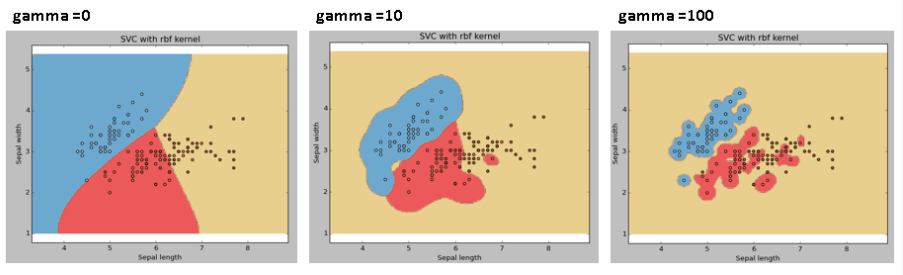